In [1]:
import pandas as pd
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, SVMSMOTE, RandomOverSampler
from sklearn.metrics import f1_score


In [2]:
df_entrenamiento = pd.read_csv('C:/Users/tomas/OneDrive - Universidad de Chile/Semestre 2023-2 Archivos/Laboratorio de Programación Científica/Laboratorios/Github/casoCDD/Oversampling/df_entrenamiento_sobre.csv')
df_val = pd.read_csv('C:/Users/tomas/OneDrive - Universidad de Chile/Semestre 2023-2 Archivos/Laboratorio de Programación Científica/Laboratorios/Github/casoCDD/Cruce/data_para_validar.csv')

In [3]:
df_entrenamiento

,Unnamed: 0.1,Unnamed: 0,grade,seq_4_avg,quiz_avg,seq_0_avg,seq_1_avg,seq_2_avg,seq_3_avg,duracion_sesion_avg,...,num_eventos_seq_2,num_eventos_seq_3,num_eventos_seq_4,avg_time_between_sessions,std_time_between_sessions,nightactivity_2_to_5,nightactivity_0_to_2,sesionesde_2_5,sesionesde_0_2,label
0,0,0,1.000000,1.0,0.965517,1.000000,1.000000,1.000000,1.0,4.944454,...,128.000000,16.000000,20.000000,7.111111,3.370625,101,311,4,4,1
1,1,1,0.990000,1.0,0.956897,1.000000,0.977273,1.000000,1.0,2.410485,...,90.000000,16.000000,6.000000,4.615385,2.844247,66,135,1,9,1
2,2,2,1.000000,1.0,0.965517,1.000000,1.000000,1.000000,1.0,3.794893,...,151.000000,47.000000,8.000000,2.950000,2.350252,297,221,4,8,1
3,3,3,0.880000,1.0,0.850690,0.625000,0.909091,0.907778,1.0,4.008391,...,201.000000,33.000000,9.000000,4.142857,3.084880,657,23,14,1,1
4,4,4,1.000000,1.0,0.965517,1.000000,1.000000,1.000000,1.0,9.352263,...,80.000000,19.000000,11.000000,3.411765,3.298841,365,514,8,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,603,260,0.926868,1.0,0.856774,1.000000,0.742882,0.779122,1.0,4.146378,...,158.818561,10.397845,1.325269,4.506014,3.697871,373,66,8,2,0
604,604,118,0.926484,1.0,0.897527,0.866209,0.942383,0.910806,1.0,5.895934,...,155.428576,17.183517,4.789011,4.455478,4.099863,649,152,13,2,0
605,605,316,0.957893,1.0,0.927401,0.947313,0.846920,1.000000,1.0,4.180800,...,193.937910,16.789254,12.107463,3.661868,3.333684,694,55,12,1,0
606,606,181,0.869460,1.0,0.836817,0.717063,0.831517,0.833140,1.0,6.648346,...,265.604752,30.586753,8.491001,3.184089,2.587531,327,148,5,4,0


In [4]:
df_entrenamiento.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'grade', 'seq_4_avg', 'quiz_avg',
       'seq_0_avg', 'seq_1_avg', 'seq_2_avg', 'seq_3_avg',
       'duracion_sesion_avg', 'duracion_sesion_std', 'duracion_EOL',
       'num_sesiones_agosto', 'num_sesiones_septiembre',
       'num_sesiones_octubre', 'page_close_mean', 'page_close_std',
       'problem_graded_mean', 'problem_graded_std', 'problem_check_mean',
       'problem_check_std', 'problem_show_mean', 'problem_show_std',
       'load_video_mean', 'load_video_std', 'play_video_mean',
       'play_video_std', 'pause_video_mean', 'pause_video_std',
       'speed_change_video_mean', 'speed_change_video_std',
       'num_eventos_seq_0', 'num_eventos_seq_1', 'num_eventos_seq_2',
       'num_eventos_seq_3', 'num_eventos_seq_4', 'avg_time_between_sessions',
       'std_time_between_sessions', 'nightactivity_2_to_5',
       'nightactivity_0_to_2', 'sesionesde_2_5', 'sesionesde_0_2', 'label'],
      dtype='object')

In [5]:
df_entrenamiento.drop(['Unnamed: 0','Unnamed: 0.1'], axis = 1, inplace=True)
X_new = df_val.drop(['username', 'Unnamed: 0'], axis=1)


In [6]:
df_entrenamiento

,grade,seq_4_avg,quiz_avg,seq_0_avg,seq_1_avg,seq_2_avg,seq_3_avg,duracion_sesion_avg,duracion_sesion_std,duracion_EOL,...,num_eventos_seq_2,num_eventos_seq_3,num_eventos_seq_4,avg_time_between_sessions,std_time_between_sessions,nightactivity_2_to_5,nightactivity_0_to_2,sesionesde_2_5,sesionesde_0_2,label
0,1.000000,1.0,0.965517,1.000000,1.000000,1.000000,1.0,4.944454,5.131721,64.000000,...,128.000000,16.000000,20.000000,7.111111,3.370625,101,311,4,4,1
1,0.990000,1.0,0.956897,1.000000,0.977273,1.000000,1.0,2.410485,2.627586,60.000000,...,90.000000,16.000000,6.000000,4.615385,2.844247,66,135,1,9,1
2,1.000000,1.0,0.965517,1.000000,1.000000,1.000000,1.0,3.794893,5.967056,59.000000,...,151.000000,47.000000,8.000000,2.950000,2.350252,297,221,4,8,1
3,0.880000,1.0,0.850690,0.625000,0.909091,0.907778,1.0,4.008391,5.076566,58.000000,...,201.000000,33.000000,9.000000,4.142857,3.084880,657,23,14,1,1
4,1.000000,1.0,0.965517,1.000000,1.000000,1.000000,1.0,9.352263,8.270573,58.000000,...,80.000000,19.000000,11.000000,3.411765,3.298841,365,514,8,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,0.926868,1.0,0.856774,1.000000,0.742882,0.779122,1.0,4.146378,5.423557,53.686827,...,158.818561,10.397845,1.325269,4.506014,3.697871,373,66,8,2,0
604,0.926484,1.0,0.897527,0.866209,0.942383,0.910806,1.0,5.895934,6.046849,56.859341,...,155.428576,17.183517,4.789011,4.455478,4.099863,649,152,13,2,0
605,0.957893,1.0,0.927401,0.947313,0.846920,1.000000,1.0,4.180800,4.723150,53.842985,...,193.937910,16.789254,12.107463,3.661868,3.333684,694,55,12,1,0
606,0.869460,1.0,0.836817,0.717063,0.831517,0.833140,1.0,6.648346,6.103428,54.640749,...,265.604752,30.586753,8.491001,3.184089,2.587531,327,148,5,4,0


In [7]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
import random
seed = 314159
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)


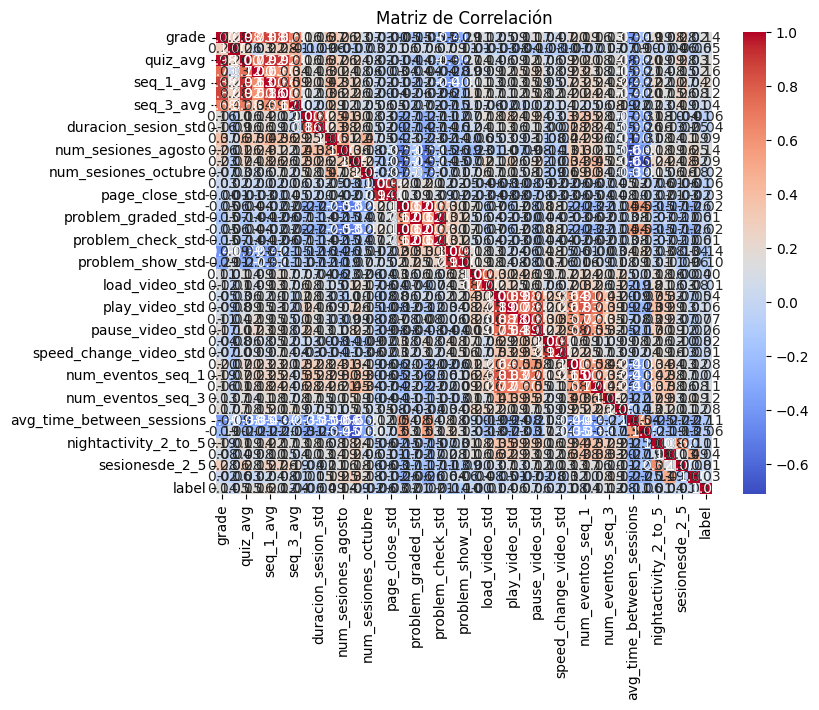

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Calcular la matriz de correlación
correlation_matrix = df_entrenamiento.corr()

# Visualizar la matriz de correlación utilizando seaborn y matplotlib
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

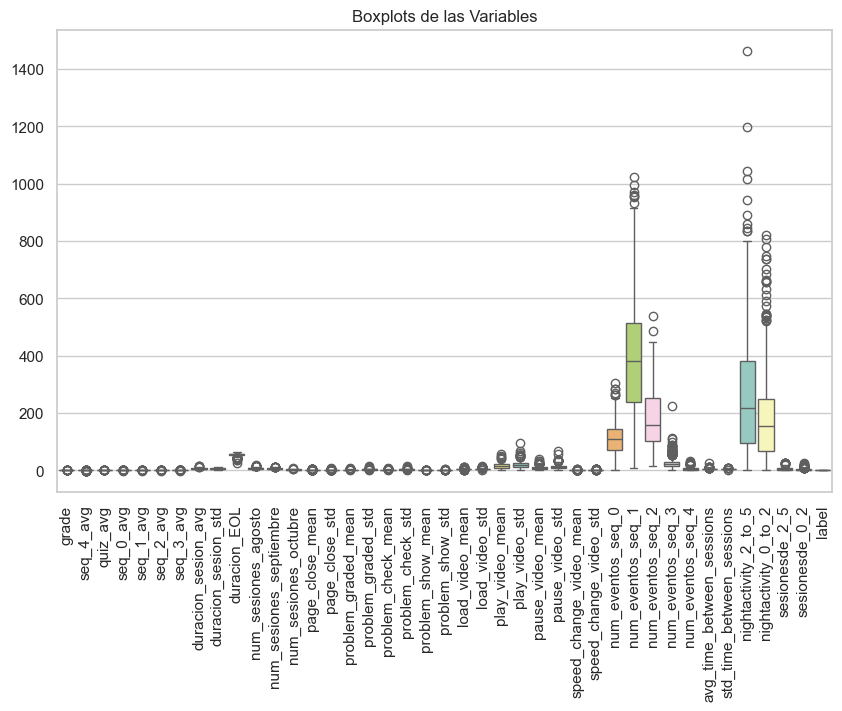

In [9]:
# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Crear boxplots para cada variable
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_entrenamiento, palette="Set3")
plt.xticks(rotation=90)  
plt.title('Boxplots de las Variables')
plt.show()

['duracion_sesion_avg', 'seq_1_avg', 'speed_change_video_mean', 'speed_change_video_std', 'seq_0_avg', 'num_eventos_seq_3', 'num_eventos_seq_4', 'problem_show_mean', 'problem_check_mean', 'problem_check_std', 'num_sesiones_noviembre', 'num_eventos_seq_2', 'nightactivity_2_to_5', 'num_sesiones_septiembre', 'problem_show_std', 'avg_day_diff', 'duracion_sesion_std', 'nightactivity_0_to_2', 'pause_video_std', 'play_video_mean', 'std_dev_day_diff', 'pause_video_mean', 'problem_graded_mean', 'load_video_std', 'problem_graded_std', 'num_eventos_seq_0', 'load_video_mean', 'num_sesiones_agosto', 'duracion_EOL', 'play_video_std', 'num_eventos_seq_1', 'grade', 'quiz_avg', 'sesionesde_2_5', 'sesionesde_0_2', 'seq_3_avg', 'seq_2_avg', 'page_close_std', 'page_close_mean', 'seq_4_avg']

In [10]:
X = df_entrenamiento.drop(columns=['label'])  # Características


y = df_entrenamiento['label']  # Etiquetas



In [11]:
#X_new = X_new.drop(columns=['duracion_EOL', 'play_video_std', 'num_eventos_seq_1', 'grade', 'quiz_avg', 'sesionesde_2_5', 
#                                   'sesionesde_0_2', 'seq_3_avg', 'seq_2_avg', 'page_close_std', 'page_close_mean', 'seq_4_avg'])

In [12]:
'''
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Supongamos que 'df' es tu DataFrame original con las características numéricas que deseas clusterizar
# Selecciona solo las columnas numéricas
numeric_columns = X.select_dtypes(include=['float64', 'int64'])

# Escala las características para asegurar que todas estén en la misma escala
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(numeric_columns)

# Determina el número óptimo de clústeres utilizando, por ejemplo, el método del codo
# Aquí uso el algoritmo KMeans como ejemplo
wcss = []
for i in range(1, 100):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Grafica el método del codo para ayudar a determinar el número óptimo de clústeres
import matplotlib.pyplot as plt
plt.plot(range(1, 100), wcss)
plt.title('Método del Codo')
plt.xlabel('Número de Clústeres')
plt.ylabel('WCSS (Suma de Cuadrados Intra-Cluster)')
plt.show()
'''


"\nimport pandas as pd\nfrom sklearn.cluster import KMeans\nfrom sklearn.preprocessing import StandardScaler, MinMaxScaler\n\n# Supongamos que 'df' es tu DataFrame original con las características numéricas que deseas clusterizar\n# Selecciona solo las columnas numéricas\nnumeric_columns = X.select_dtypes(include=['float64', 'int64'])\n\n# Escala las características para asegurar que todas estén en la misma escala\nscaler = MinMaxScaler()\nscaled_data = scaler.fit_transform(numeric_columns)\n\n# Determina el número óptimo de clústeres utilizando, por ejemplo, el método del codo\n# Aquí uso el algoritmo KMeans como ejemplo\nwcss = []\nfor i in range(1, 100):\n    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)\n    kmeans.fit(scaled_data)\n    wcss.append(kmeans.inertia_)\n\n# Grafica el método del codo para ayudar a determinar el número óptimo de clústeres\nimport matplotlib.pyplot as plt\nplt.plot(range(1, 100), wcss)\nplt.title('Método del Cod

In [13]:
'''
# Basándote en el gráfico del método del codo, elige el número óptimo de clústeres
optimal_clusters = 20  # ¡Ajusta esto según tu análisis del gráfico!

# Realiza la clusterización con el número óptimo de clústeres
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
X['cluster_label'] = kmeans.fit_predict(scaled_data)

# Ahora, 'cluster_label' contiene las etiquetas de clúster para cada fila en tu DataFrame
X
'''

"\n# Basándote en el gráfico del método del codo, elige el número óptimo de clústeres\noptimal_clusters = 20  # ¡Ajusta esto según tu análisis del gráfico!\n\n# Realiza la clusterización con el número óptimo de clústeres\nkmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)\nX['cluster_label'] = kmeans.fit_predict(scaled_data)\n\n# Ahora, 'cluster_label' contiene las etiquetas de clúster para cada fila en tu DataFrame\nX\n"

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=314159, stratify=y)


In [15]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Selecciona las columnas que deben ser escaladas
cols_to_scale = X_train.select_dtypes(include=['float64', 'int64', 'int32']).columns

# Ajusta el scaler con los datos de entrenamiento solo para aquellas columnas que no están en el rango [0, 1]
scaler = MinMaxScaler()
for col in cols_to_scale:
    if X_train[col].min() < 0 or X_train[col].max() > 1:
        X_train[col] = scaler.fit_transform(X_train[[col]])
        # Transforma también los datos de prueba usando el mismo scaler
        X_test[col] = scaler.transform(X_test[[col]])
        X_new[col] = scaler.transform(X_new[[col]])



In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Crear un clasificador de bosque aleatorio para la selección de características
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Ajustar el modelo a los datos de entrenamiento
clf.fit(X_train, y_train)

# Ajustar SelectFromModel proporcionando nombres de características
sfm = SelectFromModel(clf, threshold=0.03)
sfm.fit(X_train, y_train)

# Obtener las importancias de las características después de la selección
feature_importances = clf.feature_importances_

# Mostrar las importancias de todas las características
for feature, importance in zip(X_train.columns, feature_importances):
    print(f"{feature}: {importance}")

# Obtener las características seleccionadas
selected_features = X_train.columns[sfm.get_support()]

# Mostrar las características seleccionadas
print("\nCaracterísticas seleccionadas:")
print(selected_features)

grade: 0.01731651308111425
seq_4_avg: 0.0024547174419948634
quiz_avg: 0.02070474139806565
seq_0_avg: 0.03912161193694737
seq_1_avg: 0.05804281451966709
seq_2_avg: 0.015098851643212287
seq_3_avg: 0.013987775899152068
duracion_sesion_avg: 0.0550050162884312
duracion_sesion_std: 0.025073993086624724
duracion_EOL: 0.021508103752767908
num_sesiones_agosto: 0.02029288443753947
num_sesiones_septiembre: 0.024851483801764152
num_sesiones_octubre: 0.02346984020474657
page_close_mean: 0.004544572443168599
page_close_std: 0.004312064457273807
problem_graded_mean: 0.01975369244771106
problem_graded_std: 0.020399274071121708
problem_check_mean: 0.02377607025657201
problem_check_std: 0.025675998905955146
problem_show_mean: 0.03182267737702441
problem_show_std: 0.023839600367264898
load_video_mean: 0.023170271372565363
load_video_std: 0.022685785874298137
play_video_mean: 0.027382649198575214
play_video_std: 0.020270067400323034
pause_video_mean: 0.02409423827468928
pause_video_std: 0.0259439356570575

In [17]:
# Filtrar el conjunto de entrenamiento y prueba con las características seleccionadas
X_train = X_train[selected_features]
X_test = X_test[selected_features]

# Verificar las formas de los conjuntos de datos filtrados
print("Forma de X_train_subset:", X_train.shape)
print("Forma de X_test_subset:", X_test.shape)

Forma de X_train_subset: (486, 8)
Forma de X_test_subset: (122, 8)


In [18]:
import optuna
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def objective(trial):
    # Definir espacio de búsqueda de hiperparámetros
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 1e-2)
    num_hidden_layers = trial.suggest_int("num_hidden_layers", 1, 8)
    num_hidden_units = trial.suggest_int("num_hidden_units", 16, 512)
    dropout_rate = trial.suggest_float("dropout_rate", 0.0, 0.5)
    optimizer = trial.suggest_categorical("optimizer", ["adam", "sgd", "rmsprop"])
    activation = trial.suggest_categorical("activation", ["relu", "tanh", "sigmoid", "elu"])
    batch_size = trial.suggest_categorical("batch_size", [608//16, 608//32, 608//64])
    sampling_type = trial.suggest_categorical("sampling_type", ["RandomOverSampler", "SMOTE", "BorderlineSMOTE", "SVMSMOTE"])
    
    # Seleccionar el tipo de oversampling/SMOTE según la sugerencia de Optuna
    if sampling_type == "RandomOverSampler":
        sampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
    elif sampling_type == "SMOTE":
        sampler = SMOTE(sampling_strategy='auto', random_state=42)
    elif sampling_type == "BorderlineSMOTE":
        sampler = BorderlineSMOTE(sampling_strategy='auto', random_state=42)
    elif sampling_type == "SVMSMOTE":
        sampler = SVMSMOTE(sampling_strategy='auto', random_state=42)
    else:
        raise ValueError("Tipo de muestreo no soportado")

    # Aplicar SMOTE al conjunto de entrenamiento actual
    X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
    
    # Construir el modelo de red neuronal con los hiperparámetros
    model = keras.Sequential()
    for _ in range(num_hidden_layers):
        model.add(keras.layers.Dense(num_hidden_units, activation=activation))
        model.add(keras.layers.BatchNormalization())
        model.add(keras.layers.Dropout(dropout_rate))
        
    model.add(keras.layers.Dense(1, activation="sigmoid"))

    # Compilar y entrenar el modelo
    if optimizer == "adam":
        optimizer_obj = keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == "sgd":
        optimizer_obj = keras.optimizers.SGD(learning_rate=learning_rate)
    elif optimizer == "rmsprop":
        optimizer_obj = keras.optimizers.RMSprop(learning_rate=learning_rate)
    else:
        raise ValueError("Optimizador no soportado")

    model.compile(optimizer=optimizer_obj,
                  loss="binary_crossentropy",
                  metrics=["accuracy"])
    
    early_stopping = keras.callbacks.EarlyStopping(
        patience=50,
        min_delta=0.001,
        restore_best_weights=True,
    )
    
    model.fit(X_resampled, y_resampled, epochs=500, batch_size=batch_size, verbose=0, validation_data=(X_test, y_test), callbacks=[early_stopping])

    # Evaluar el modelo
    y_pred = (model.predict(X_test) > 0.5).astype(int)
    
    # Calcular el puntaje F1
    f1 = f1_score(y_test, y_pred)

    
    # Almacenar los pesos del modelo como un atributo del ensayo de Optuna
    trial.set_user_attr("model_weights", model.get_weights())
    
    # Guardar el modelo en los atributos de usuario del mejor intento
    trial.set_user_attr('model', model)

    return f1

# Crear un estudio Optuna

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

# Obtener el mejor conjunto de hiperparámetros
best_params = study.best_params
print("Mejor conjunto de hiperparámetros:", best_params)

# Después de la optimización, antes de guardar el objeto Study
best_model = study.best_trial.user_attrs.get('model')


c:\Users\tomas\anaconda3\envs\Lab_6\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2023-11-26 11:35:38,387] A new study created in memory with name: no-name-1b28b3b6-78ba-4bbd-a811-d261b44f7de5


4/4 [==============================] - 0s 3ms/step


[I 2023-11-26 11:36:40,517] Trial 0 finished with value: 0.6727272727272727 and parameters: {'learning_rate': 0.0027858557096057026, 'num_hidden_layers': 4, 'num_hidden_units': 453, 'dropout_rate': 0.40158965384306866, 'optimizer': 'adam', 'activation': 'relu', 'batch_size': 9, 'sampling_type': 'SVMSMOTE'}. Best is trial 0 with value: 0.6727272727272727.


4/4 [==============================] - 0s 2ms/step


[I 2023-11-26 11:36:51,124] Trial 1 finished with value: 0.6991869918699187 and parameters: {'learning_rate': 0.005801676718581345, 'num_hidden_layers': 1, 'num_hidden_units': 155, 'dropout_rate': 0.48219670527646624, 'optimizer': 'rmsprop', 'activation': 'relu', 'batch_size': 19, 'sampling_type': 'BorderlineSMOTE'}. Best is trial 1 with value: 0.6991869918699187.


4/4 [==============================] - 0s 5ms/step


[I 2023-11-26 11:37:30,633] Trial 2 finished with value: 0.7368421052631579 and parameters: {'learning_rate': 0.005864052750338065, 'num_hidden_layers': 5, 'num_hidden_units': 47, 'dropout_rate': 0.21963037431205729, 'optimizer': 'rmsprop', 'activation': 'elu', 'batch_size': 9, 'sampling_type': 'SVMSMOTE'}. Best is trial 2 with value: 0.7368421052631579.


4/4 [==============================] - 0s 4ms/step


[I 2023-11-26 11:37:43,107] Trial 3 finished with value: 0.358974358974359 and parameters: {'learning_rate': 0.007526632158504427, 'num_hidden_layers': 8, 'num_hidden_units': 246, 'dropout_rate': 0.3448045218632665, 'optimizer': 'sgd', 'activation': 'elu', 'batch_size': 38, 'sampling_type': 'SMOTE'}. Best is trial 2 with value: 0.7368421052631579.


4/4 [==============================] - 0s 2ms/step


[I 2023-11-26 11:37:54,448] Trial 4 finished with value: 0.6545454545454545 and parameters: {'learning_rate': 0.007710374387041293, 'num_hidden_layers': 6, 'num_hidden_units': 18, 'dropout_rate': 0.26767647945932654, 'optimizer': 'sgd', 'activation': 'elu', 'batch_size': 38, 'sampling_type': 'RandomOverSampler'}. Best is trial 2 with value: 0.7368421052631579.


4/4 [==============================] - 0s 3ms/step


[I 2023-11-26 11:38:46,357] Trial 5 finished with value: 0.7519999999999999 and parameters: {'learning_rate': 0.00428428223034672, 'num_hidden_layers': 5, 'num_hidden_units': 270, 'dropout_rate': 0.33207265905738803, 'optimizer': 'adam', 'activation': 'sigmoid', 'batch_size': 19, 'sampling_type': 'RandomOverSampler'}. Best is trial 5 with value: 0.7519999999999999.


4/4 [==============================] - 0s 5ms/step


[I 2023-11-26 11:39:41,724] Trial 6 finished with value: 0.6956521739130433 and parameters: {'learning_rate': 0.009527920419258281, 'num_hidden_layers': 8, 'num_hidden_units': 416, 'dropout_rate': 0.4252468780946866, 'optimizer': 'adam', 'activation': 'tanh', 'batch_size': 19, 'sampling_type': 'SMOTE'}. Best is trial 5 with value: 0.7519999999999999.


4/4 [==============================] - 0s 2ms/step


[I 2023-11-26 11:39:51,726] Trial 7 finished with value: 0.6129032258064517 and parameters: {'learning_rate': 0.0008547008161253158, 'num_hidden_layers': 1, 'num_hidden_units': 297, 'dropout_rate': 0.3341046209800509, 'optimizer': 'sgd', 'activation': 'elu', 'batch_size': 9, 'sampling_type': 'SVMSMOTE'}. Best is trial 5 with value: 0.7519999999999999.


4/4 [==============================] - 0s 3ms/step


[I 2023-11-26 11:40:07,609] Trial 8 finished with value: 0.784 and parameters: {'learning_rate': 0.001975081065261902, 'num_hidden_layers': 4, 'num_hidden_units': 291, 'dropout_rate': 0.15292609155156822, 'optimizer': 'rmsprop', 'activation': 'elu', 'batch_size': 38, 'sampling_type': 'RandomOverSampler'}. Best is trial 8 with value: 0.784.


4/4 [==============================] - 0s 2ms/step


[I 2023-11-26 11:40:17,780] Trial 9 finished with value: 0.625 and parameters: {'learning_rate': 0.006195899271258506, 'num_hidden_layers': 3, 'num_hidden_units': 242, 'dropout_rate': 0.379122467079532, 'optimizer': 'sgd', 'activation': 'sigmoid', 'batch_size': 38, 'sampling_type': 'BorderlineSMOTE'}. Best is trial 8 with value: 0.784.


4/4 [==============================] - 0s 3ms/step


[I 2023-11-26 11:40:47,990] Trial 10 finished with value: 0.7521367521367521 and parameters: {'learning_rate': 8.753818726891485e-05, 'num_hidden_layers': 3, 'num_hidden_units': 387, 'dropout_rate': 0.07736562980249839, 'optimizer': 'rmsprop', 'activation': 'tanh', 'batch_size': 38, 'sampling_type': 'RandomOverSampler'}. Best is trial 8 with value: 0.784.


4/4 [==============================] - 0s 2ms/step


[I 2023-11-26 11:41:05,734] Trial 11 finished with value: 0.7592592592592592 and parameters: {'learning_rate': 0.0005915155975897396, 'num_hidden_layers': 3, 'num_hidden_units': 369, 'dropout_rate': 0.10201354358326609, 'optimizer': 'rmsprop', 'activation': 'tanh', 'batch_size': 38, 'sampling_type': 'RandomOverSampler'}. Best is trial 8 with value: 0.784.


4/4 [==============================] - 0s 3ms/step


[I 2023-11-26 11:41:12,559] Trial 12 finished with value: 0.5111111111111111 and parameters: {'learning_rate': 0.0017647999689078659, 'num_hidden_layers': 3, 'num_hidden_units': 355, 'dropout_rate': 0.10711041959621259, 'optimizer': 'rmsprop', 'activation': 'tanh', 'batch_size': 38, 'sampling_type': 'RandomOverSampler'}. Best is trial 8 with value: 0.784.


4/4 [==============================] - 0s 2ms/step


[I 2023-11-26 11:41:27,049] Trial 13 finished with value: 0.7863247863247863 and parameters: {'learning_rate': 0.0025619258034823254, 'num_hidden_layers': 2, 'num_hidden_units': 494, 'dropout_rate': 0.03284143483180424, 'optimizer': 'rmsprop', 'activation': 'tanh', 'batch_size': 38, 'sampling_type': 'RandomOverSampler'}. Best is trial 13 with value: 0.7863247863247863.


4/4 [==============================] - 0s 3ms/step


[I 2023-11-26 11:41:37,984] Trial 14 finished with value: 0.7107438016528925 and parameters: {'learning_rate': 0.003372906585502129, 'num_hidden_layers': 2, 'num_hidden_units': 494, 'dropout_rate': 0.0028932222142690894, 'optimizer': 'rmsprop', 'activation': 'elu', 'batch_size': 38, 'sampling_type': 'RandomOverSampler'}. Best is trial 13 with value: 0.7863247863247863.
[W 2023-11-26 11:41:42,584] Trial 15 failed with parameters: {'learning_rate': 0.0019363921421313322, 'num_hidden_layers': 6, 'num_hidden_units': 139, 'dropout_rate': 0.16594963730667667, 'optimizer': 'rmsprop', 'activation': 'tanh', 'batch_size': 38, 'sampling_type': 'RandomOverSampler'} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "c:\Users\tomas\anaconda3\envs\Lab_6\Lib\site-packages\optuna\study\_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "C:\Users\tomas\AppData\Local\Temp\ipykernel_8048\4291918021.

KeyboardInterrupt: 

In [21]:
from sklearn.metrics import classification_report
# Hacer predicciones con el mejor modelo en el conjunto de prueba
y_pred = (best_model.predict(X_test) > 0.5).astype(int)

# Generar un informe de clasificación
report = classification_report(y_test, y_pred)
print("Informe de clasificación:\n", report)

4/4 [==============================] - 0s 3ms/step
Informe de clasificación:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95        61
           1       0.98      0.92      0.95        61

    accuracy                           0.95       122
   macro avg       0.95      0.95      0.95       122
weighted avg       0.95      0.95      0.95       122



In [22]:
# Realizar predicciones con el modelo cargado
y_pred = (best_model.predict(X_new) > 0.5).astype(int)

# Agregar las predicciones como una nueva columna al conjunto de datos original
resultados = pd.DataFrame({'username': df_val['username'], 'Prediccion': y_pred.flatten()})

# Guardar los resultados en un archivo CSV
resultados.to_csv('resultados_predichos.csv', index=False)

5/5 [==============================] - 0s 4ms/step
